In [1]:
pvalue = 2.3e-16

if pvalue < 0.05: 
    print('귀무가설 기각, 대립가설 채택')
elif pvalue > 0.05: 
    print('귀무가설 채택, 대립가설 기각')

귀무가설 기각, 대립가설 채택


정규성 검정

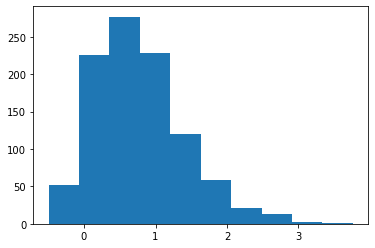

ShapiroResult(statistic=0.9578887224197388, pvalue=2.309859641255865e-16)
귀무가설: 정규성을 만족한다. 
귀무가설 기각
ShapiroResult(statistic=0.9976891279220581, pvalue=0.17545907199382782)
귀무가설: 정규성을 만족한다.
귀무가설 채택


In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

# 정규성 검정
from scipy.stats import shapiro 

print(shapiro(df))

pvalue = shapiro(df).pvalue

print('귀무가설: 정규성을 만족한다. ')
if pvalue > 0.05: 
    print('귀무가설 채택')
else: 
    print('귀무가설 기각')

# 로그 변환
import numpy as np 

log_df = np.log1p(df)
print(shapiro(log_df))

pvalue = shapiro(log_df).pvalue

print('귀무가설: 정규성을 만족한다.')
if pvalue > 0.05: 
    print('귀무가설 채택')
else: 
    print('귀무가설 기각')

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
# plt.hist(df)
# plt.show()
display(df)

from scipy.stats import shapiro, anderson 

pvalue = shapiro(df).pvalue
print('귀무가설: 정규성을 만족한다.')
if pvalue > 0.05: 
    print('귀무가설 채택')
else: 
    print('귀무가설 기각')

print(anderson(df['data'].values))


,data
0,296.016803
1,299.628476
2,298.232057
3,293.256749
4,301.037710
...,...
5995,304.008424
5996,301.043219
5997,302.542420
5998,294.456145


귀무가설: 정규성을 만족한다.
귀무가설 채택
AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


c:\Users\yerim\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


등분산성

In [12]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
display(df.head())

# 결측치 확인 
display(df.isnull().sum())

# 등분산성 검정
from scipy.stats import bartlett, fligner, levene

a = df[df['class'] == 'A']['score']
b = df[df['class'] == 'B']['score']

print(bartlett(a, b).pvalue)

print(fligner(a, b, center='median'))
print(fligner(a, b, center='mean'))

print(levene(a, b, center='median'))
print(levene(a, b, center='mean'))

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


class    0
score    0
dtype: int64

0.609873758447687
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


단일 표본 T검정

In [2]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
# display(df)

from scipy.stats import shapiro 
from scipy.stats import ttest_1samp
from scipy.stats import wilcoxon

shapiro_pvalue = shapiro(df).pvalue
print('shapiro 정규성 검정 시, pvalue는', shapiro_pvalue, '으로')

alpha = 0.05
if shapiro_pvalue > alpha : 
    print('정규성을 만족하므로 단일 표본 T검정을 수행한다.\n')

    # 단일 표본 T검정 
    pvalue = ttest_1samp(df['height'], 165).pvalue
    print('단일 표본 T검정 시, pvalue는', pvalue, '이므로')

    print('(귀무가설: 100명의 평균 키는 165이다.)', end ='')
    if pvalue > 0.05: 
        print(' 채택')
    else: 
        print(' 기각')

else: 
    print('귀무가설 기각, 정규성을 가지지 않는다.\n')
    print('따라서 비모수 검정(wilcoxon)을 수행한다.')

    # 비모수 검정(wilcoxon)
    pvalue = wilcoxon(df['height'] - 165).pvalue
    print('비모수 검정 시, pvalue는', pvalue, '이므로')

    if pvalue > 0.05: 
        print(' 채택')
    else: 
        print(' 기각')


shapiro 정규성 검정 시, pvalue는 0.455832302570343 으로
정규성을 만족하므로 단일 표본 T검정을 수행한다.

단일 표본 T검정 시, pvalue는 0.0018367171548080209 이므로
(귀무가설: 100명의 평균 키는 165이다.) 기각


독립 표본 T검정

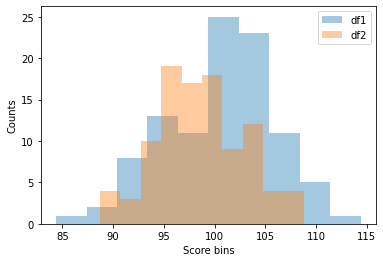

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [53]:
display(df1.isnull().sum())
display(df2.isnull().sum())

data    0
dtype: int64

data    0
dtype: int64

In [44]:
# 문제. 두 학급의 시험 평균은 동일하다고 할 수 있는지 검정하라 

# 정규성 검정 
from scipy.stats import shapiro, anderson 

print(shapiro(df1))
print(shapiro(df2))
# --> 두 집단 모두 정규성을 만족한다. 

# 등분산성 검정 
from scipy.stats import bartlett, fligner, levene 

# print(bartlett(df1['data'], df2['data']))
# # --> 등분산성 만족하지 않는다. 
# print(fligner(df1, df2, center='median'))
# print(fligner(df1, df2, center='mean'))
# # --> 등분산성 만족한다. 
print(levene(df1['data'], df2['data'], center='median'))
print(levene(df1['data'], df2['data'], center='mean'))
# --> 등분산성 만족한다. 

from scipy.stats import ttest_ind
print(ttest_ind(df1, df2))
# 귀무가설: 두 집단의 평균은 동일하다. 
# 즉, 두 집단은 독립적이지 않다. 

# 대립가설 채택 
# --> 두 집단의 평균은 동일하지 않다. 
# --> 두 집단은 독립이다. 

ShapiroResult(statistic=0.9860947728157043, pvalue=0.37968069314956665)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)
BartlettResult(statistic=4.170597307474754, pvalue=0.04113129672708929)
FlignerResult(statistic=2.107582676566027, pvalue=0.14657068909613508)
FlignerResult(statistic=2.3555639709996057, pvalue=0.12483673059701819)
LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)
LeveneResult(statistic=2.7544079280040785, pvalue=0.09856970572214527)
Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))


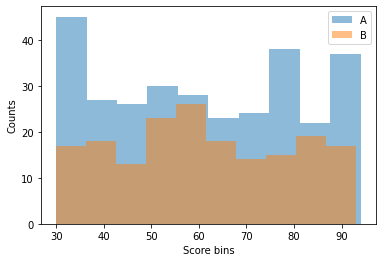

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [56]:
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

A      0
B    120
dtype: int64
A    0
B    0
dtype: int64


In [57]:
# 문제. 두 학급의 시험 평균은 동일한지 검정하라 

# 정규성 검정
from scipy.stats import shapiro, anderson
print(shapiro(df['A']))
print(shapiro(df['B']))

print(shapiro(df['A']).pvalue > 0.05)
# --> A 집단은 정규성을 만족하지 않는다. 

# 비모수 검정 
from scipy.stats import mannwhitneyu, ranksums

print(mannwhitneyu(df['A'], df['B']).pvalue>0.05)
print(ranksums(df['A'], df['B']).pvalue>0.05)
# 귀무가설: 두 집단은 서로 평균이 같다. 
# 즉, 두 집단은 서로 독립적이지 않다. 

# --> 귀무가설 채택
# --> 두 집단은 서로 평균이 같고, 독립적이지 않다. 

ShapiroResult(statistic=0.9456477761268616, pvalue=2.320352905371692e-06)
ShapiroResult(statistic=0.9639440774917603, pvalue=0.00013570845476351678)
False
True
True


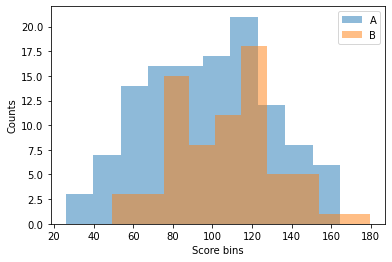

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [59]:
print(df.isnull().sum())

group    0
data     0
dtype: int64


In [66]:
# 문제. 두 집단의 평균은 같은지 검정하라 
# 정규성 검정 
from scipy.stats import shapiro, anderson 

a = df[df['group']=='a']['data']
b = df[df['group']=='b']['data']

print(shapiro(a))
print(shapiro(b))
# --> 두 집단은 모두 정규성을 만족한다. 

# 등분산성 검정
from scipy.stats import bartlett, fligner, levene

# print(bartlett(a, b))
# # --> 등분산성 성립하지 않는다. 
# print(fligner(a, b, center='median'))
# print(fligner(a, b, center='mean'))
# # --> 등분산성 성립하지 않는다. 
print(levene(a, b, center='median'))
print(levene(a, b, center='mean'))
# --> 등분산성 성립하지 않는다. 

# 두 집단의 독립성 검정 
print(ttest_ind(a, b, equal_var=False))
# 귀무가설: 두 집단의 평균은 서로 같고, 독립적이지 않다. 
# --> 귀무가설 기각, 대립가설 채택 
# 두 집단은 서로 독립적이다. 


ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831849336624146, pvalue=0.47018250823020935)
LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)
LeveneResult(statistic=6.0448405973286246, pvalue=0.014852059669056625)


Ttest_indResult(statistic=-2.1949470315829265, pvalue=0.029512802991767915)

In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

print(df)

              a           b
0    121.023118   69.982090
1     69.740978  139.774624
2     93.737693  175.425924
3    100.331645   85.493555
4     75.048925   83.488953
..          ...         ...
115   97.955501         NaN
116  116.839209         NaN
117   88.257448         NaN
118   89.904714         NaN
119   88.250342         NaN

[120 rows x 2 columns]


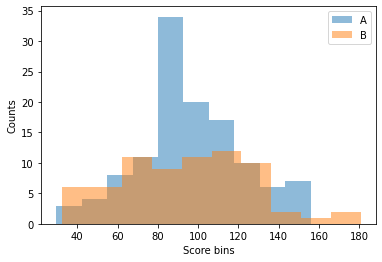

In [69]:
plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [70]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

a     0
b    50
dtype: int64
a    0
b    0
dtype: int64


In [75]:
# 문제. 두 집단이 서로 독립한지 검정하라 

# 정규성 검정 
from scipy.stats import shapiro

print(shapiro(df['a']))
print(shapiro(df['b']))
# --> 두 집단은 모두 정규성을 만족한다. 

# 등분산성 검정 
from scipy.stats import levene

print(levene(df['a'], df['b'], center='median'))
print(levene(df['a'], df['b'], center='mean'))
# --> 두 집단은 등분산성을 만족하지 않는다. 

# 독립성 검정 
from scipy.stats import ttest_ind

print(ttest_ind(df['a'], df['b'], equal_var=False))
# --> 귀무가설 채택 
# 두 집단은 서로 독립적이지 않다. 

ShapiroResult(statistic=0.9836674928665161, pvalue=0.49541446566581726)
ShapiroResult(statistic=0.9854329228401184, pvalue=0.5937777757644653)
LeveneResult(statistic=4.247654406016666, pvalue=0.04118219810338821)
LeveneResult(statistic=4.298941972110079, pvalue=0.039995629214321836)
Ttest_indResult(statistic=0.3406665402843751, pvalue=0.7339049438228125)


대응 표본 T검정

In [76]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

print(df)
# fig ,ax = plt.subplots(1,2)
# ax[0].boxplot(df['before'])
# ax[1].boxplot(df['after'])
# ax[0].set_xticklabels(['before'])
# ax[1].set_xticklabels(['after'])
# ax[0].set_ylim(100,350)
# ax[1].set_ylim(100,350)
# ax[1].get_yaxis().set_visible(False)
# ax[0].set_ylabel('value')
# plt.show()

         before       after
0    216.289726  175.897620
1    190.279454  189.295934
2    217.744689  219.233935
3    235.021264  195.021021
4    234.098484  213.218227
..          ...         ...
115  186.546583  239.845621
116  199.853014  300.032396
117  182.322187  201.310529
118  256.739402  195.169040
119  248.858766  292.766655

[120 rows x 2 columns]


In [79]:
# 문제. 투약 전후 변화가 있는지 검정하라. 

# 정규성 검정 
from scipy.stats import shapiro, anderson 

print(shapiro(df['before']))
print(shapiro(df['after']))
# --> 두 집단은 모두 정규성을 만족한다. 

# 대응 표본 T검정
from scipy.stats import ttest_rel 

print(ttest_rel(df['before'], df['after']))
# --> 귀무가설 기각, 대립가설 채택 
# 투약 전후 변화가 있다. 


ShapiroResult(statistic=0.9907894134521484, pvalue=0.6065712571144104)
ShapiroResult(statistic=0.9916958808898926, pvalue=0.6923439502716064)
Ttest_relResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513)


In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

print(df)
# fig ,ax = plt.subplots(1,2)
# ax[0].boxplot(df['before'])
# ax[1].boxplot(df['after'])
# ax[0].set_xticklabels(['before'])
# ax[1].set_xticklabels(['after'])
# ax[0].set_ylim(130,300)
# ax[1].set_ylim(130,300)
# ax[1].get_yaxis().set_visible(False)
# ax[0].set_ylabel('value')
# plt.show()

         before       after
0    253.566615  220.857837
1    195.080189  209.206667
2    228.299690  173.070057
3    279.417367  222.356980
4    230.062210  248.371045
..          ...         ...
115  198.366077  219.592137
116  237.245234  234.151934
117  264.968225  230.706493
118  246.916445  275.615104
119  254.735254  183.991936

[120 rows x 2 columns]


In [82]:
# 문제. 투약 전후 변화가 있는지 검정하라 

# 정규성 검정 
from scipy.stats import shapiro, anderson 

print(shapiro(df['before']))
print(shapiro(df['after']))
# --> 두 집단은 모두 정규성을 만족한다. 

# 대응표본 T검정
from scipy.stats import ttest_rel 

print(ttest_rel(df['before'], df['after']))
# --> 귀무가설 채택 
# 투약 전후 변화가 없다. 

ShapiroResult(statistic=0.9920635223388672, pvalue=0.7270597219467163)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229286432266235)
Ttest_relResult(statistic=0.188900575991026, pvalue=0.8504925317234707)


In [83]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

print(df)
# fig ,ax = plt.subplots(1,2)
# ax[0].boxplot(df['before'])
# ax[1].boxplot(df['after'])
# ax[0].set_xticklabels(['before'])
# ax[1].set_xticklabels(['after'])
# ax[0].set_ylim(145,170)
# ax[1].set_ylim(145,170)
# ax[1].get_yaxis().set_visible(False)
# ax[0].set_ylabel('value')
# plt.show()

    before  after
0      153    162
1      153    163
2      158    159
3      157    158
4      167    160
5      164    155
6      168    167
7      150    168
8      155    162
9      152    158
10     157    151
11     155    150
12     151    169
13     164    169
14     154    168
15     156    150
16     150    163
17     164    158
18     153    153
19     163    160
20     150    166
21     154    151
22     150    166
23     163    167
24     165    160
25     156    165
26     150    155
27     154    153
28     152    169
29     162    159
30     150    169
31     153    153
32     162    154
33     163    159
34     153    155
35     153    150
36     151    162
37     158    154
38     153    154
39     163    166
40     159    156
41     156    153
42     152    160
43     168    157
44     154    167
45     162    160
46     165    160
47     157    160
48     161    159
49     157    154


In [85]:
# 문제. 시험 전 후 차이가 있는지 검정하라 

# 정규성 검정 
from scipy.stats import shapiro, anderson 

print(shapiro(df['before']))
print(shapiro(df['after']))
# --> 두 집단 모두 정규성을 만족하지 않는다. 

# 대응 표본 T검정
from scipy.stats import ttest_rel 

# print(ttest_rel(df['before'], df['after']))

# 비모수 검정
from scipy.stats import wilcoxon

print(wilcoxon(df['before'], df['after']))
# --> 귀무가설 채택 
# 시험 전 후 차이가 없다. 

ShapiroResult(statistic=0.9173726439476013, pvalue=0.001897332607768476)
ShapiroResult(statistic=0.9448971152305603, pvalue=0.021141061559319496)
WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


In [87]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

print(df)
# fig ,ax = plt.subplots(1,2)
# ax[0].boxplot(df[df['group']=='a'].rpm)
# ax[1].boxplot(df[df['group']=='b'].rpm)
# ax[0].set_xticklabels(['a'])
# ax[1].set_xticklabels(['b'])
# ax[0].set_ylim(430,600)
# ax[1].set_ylim(430,600)
# ax[1].get_yaxis().set_visible(False)
# ax[0].set_ylabel('rpm')
# plt.show()

            rpm group
0    474.551593     a
1    450.548420     a
2    563.720934     a
3    506.886966     a
4    471.724049     a
..          ...   ...
135  508.802475     b
136  485.981627     b
137  499.289525     b
138  520.895380     b
139  506.458813     b

[140 rows x 2 columns]


In [91]:
# 문제. b > a 임을 검정하라 

# 정규성 검정
from scipy.stats import shapiro, anderson 

a = df[df['group'] == 'a']['rpm']
b = df[df['group'] == 'b']['rpm']

print(shapiro(a))
print(shapiro(b))
# --> 두 집단 모두 정규성 만족 

# 대응 표본 T검정 
from scipy.stats import ttest_rel 

# 정답 
print(ttest_rel(b, a, alternative='greater'))
# --> 귀무가설 기각, 대립가설 채택 
# b상황에서 a상황보다 rpm 값이 높다. 

# 통계량 부호가 반대로 나온다. 
print(ttest_rel(a, b, alternative='less'))

ShapiroResult(statistic=0.9907213449478149, pvalue=0.8884111046791077)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)
Ttest_relResult(statistic=1.9018108294460812, pvalue=0.030685663464464715)
Ttest_relResult(statistic=-1.9018108294460812, pvalue=0.030685663464464715)


카이 제곱 검정

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

print(df)
# plt.bar(df.dice_number,df.counts)
# plt.xlabel('dice value')
# plt.ylabel('counts')
# plt.show()

   dice_number  counts
0            1      24
1            2      20
2            3      28
3            4      22
4            5      28
5            6      22


In [12]:
from scipy.stats import chisquare

df['expected'] = (df['counts']/6).sum().astype('int')
print(df)

print(chisquare(df['counts'], df['expected']))
# 귀무가설 채택 
# --> 주사위의 분포에서 나올 가능성이 없다. 
# 즉, 기대되는 분포와 일치한다. 

   dice_number  counts  expected
0            1      24        24
1            2      20        24
2            3      28        24
3            4      22        24
4            5      28        24
5            6      22        24
Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


: 

In [2]:
# 문제1. 카이 제곱 검정(적합도 검정)
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()
# display(df)

target = df['hands'].value_counts().to_frame()
# display(target)

target['expected'] = [int(target['hands'].sum() * 0.8), int(target['hands'].sum() * 0.2)]
display(target)

from scipy.stats import chisquare 

chisquare(target['hands'], target['expected'])
# 귀무가설: 왼손잡이: 오른손잡이 비율은 0.2:0.8 로 알려져있다. 
# --> 귀무가설 기각, 대립가설 채택 
# 비율이 적합하지 않다 ! 주어진 데이터는 기대되는 분포와 일치하지 않다 ! 

,hands,expected
right,420,400
left,80,100


Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)

In [3]:
# 문제2. 성별과 등급이 독립적인지 검정하라 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

# 교차분석
cross_df = pd.crosstab(df['측정회원성별'],df['등급'])
display(cross_df)

from scipy.stats import chi2_contingency

print(chi2_contingency(cross_df))

chi2, p, dof, expected = chi2_contingency(cross_df)
print('pvalue: ', p)

print('귀무가설: 성별과 등급은 연관이 없다.')
if p > 0.05: 
    print('귀무가설을 기각할 수 없다.')
else: 
    print('귀무가설을 기각한다. ')
    

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


(120.06233631119409, 7.481892813401677e-26, 3, array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
pvalue:  7.481892813401677e-26
귀무가설: 성별과 등급은 연관이 없다.
귀무가설을 기각한다. 


In [3]:
# 문제3. 성별과 참석 간에 관련이 있는지 검정하라 
# 피셔 정확 검정, 빈도수가 5개 이하 셀의 수가 전체 20% 이상일 경우
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

# 교차 검증
crosstab_df = df.iloc[:-1, :-1]
print(crosstab_df)
print()

# 카이 제곱 검정
from scipy.stats import chi2_contingency, fisher_exact

print(chi2_contingency(crosstab_df))

chi2, p, dof, expected = chi2_contingency(crosstab_df)
print('pvalue: ', p)

print('귀무가설: 성별과 참석 간에 관련이 없다. 즉, 서로 독립이다.')
if p > 0.05: 
    print('귀무가설 채택')
else: 
    print('귀무가설 기각')
print()

# 피셔의 정확도 검정
print('pvalue: ', fisher_exact(crosstab_df))
print('귀무가설 기각')

    불참  참석
남성   4   2
여성   1   9

(3.277575757575758, 0.07023259819117404, 1, array([[1.875, 4.125],
       [3.125, 6.875]]))
pvalue:  0.07023259819117404
귀무가설: 성별과 참석 간에 관련이 없다. 즉, 서로 독립이다.
귀무가설 채택

pvalue:  (18.0, 0.035714285714285726)
귀무가설 기각


아노바 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova.csv')

data1 = df.x1
data2 = df.x2
data3 = df.x3

# fig,ax = plt.subplots(1,2,figsize=(12,4))
# ax[0].hist(data,alpha=0.3,bins=30,label='x1')
# ax[0].hist(data2,alpha=0.3,bins=30,label='x2')
# ax[0].hist(data3,alpha=0.3,bins=30,label='x3')
# ax[0].legend()
# labels = ['x1', 'x2', 'x3']
# lst =[data,data2,data3]
# ax[1].boxplot(lst, labels=labels) 
# plt.show()

In [7]:
# 문제. x1, x2, x3 변수들의 평균 차이가 존재하는지 검정하라 
# 차이가 존재한다면 사후분석까지 진행하라 

# 정규성 검정
from scipy.stats import shapiro

print(shapiro(data1))
print(shapiro(data2))
print(shapiro(data3))
# --> 모두 정규성 만족한다. 

# 등분산성 검정
from scipy.stats import levene

print(levene(data1, data2, data3))
# --> 세 집단은 서로 등분산성을 만족한다. 

# ANOVA
from scipy.stats import f_oneway

print(f_oneway(data1, data2, data3))
# --> 대립가설 채택
# 세 집단중 임의의 두 집단은 서로 평균이 동일하지 않다. 

ShapiroResult(statistic=0.9979788064956665, pvalue=0.27388232946395874)
ShapiroResult(statistic=0.9979414939880371, pvalue=0.25899720191955566)
ShapiroResult(statistic=0.9987626671791077, pvalue=0.7304413914680481)
LeveneResult(statistic=2.71270174202054, pvalue=0.06652021922816238)
F_onewayResult(statistic=209.88499932318638, pvalue=4.919152988455592e-86)


In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova2.csv')

data1 = df.x1
data2 = df.x2
data3 = df.x3

# fig,ax = plt.subplots(1,2,figsize=(12,4))
# ax[0].hist(data,alpha=0.3,bins=30,label='x1')
# ax[0].hist(data2,alpha=0.3,bins=30,label='x2')
# ax[0].hist(data3,alpha=0.3,bins=30,label='x3')
# ax[0].legend()
# labels = ['x1', 'x2', 'x3']
# lst =[data,data2,data3]
# ax[1].boxplot(lst, labels=labels) 
# plt.show()

In [11]:
# 문제. x1, x2, x3 변수들의 평균 차이가 존재하는지 검정하라 

# 정규성 검정
from scipy.stats import shapiro

print(shapiro(data1))
print(shapiro(data2))
print(shapiro(data3))
# --> 세 집단은 모두 정규성을 만족한다. 

# 등분산성 검정
from scipy.stats import levene

print(levene(data1, data2, data3))
# --> 세 집단은 서로 등분산성을 만족한다. 

# ANOVA
from scipy.stats import f_oneway

print(f_oneway(data1, data2, data3))
# --> 귀무가설 채택
# 세 집단은 서로 평균의 차이가 없다. 

ShapiroResult(statistic=0.9886646866798401, pvalue=0.5584300756454468)
ShapiroResult(statistic=0.992436408996582, pvalue=0.8518696427345276)
ShapiroResult(statistic=0.9848726987838745, pvalue=0.31093811988830566)
LeveneResult(statistic=1.845797549925243, pvalue=0.15970603203148068)
F_onewayResult(statistic=2.386152612702158, pvalue=0.09374426938585284)


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova8.csv')

data1 = df[df.target=='a'].value
data2 = df[df.target=='b'].value
data3 = df[df.target=='c'].value

# fig,ax = plt.subplots(1,2,figsize=(12,4))
# ax[0].hist(data,alpha=0.3,bins=30,label='a')
# ax[0].hist(data2,alpha=0.3,bins=30,label='b')
# ax[0].hist(data3,alpha=0.3,bins=30,label='c')
# ax[0].legend()
# labels = ['a', 'b', 'c']
# lst =[data,data2,data3]
# ax[1].boxplot(lst, labels=labels) 
# plt.show()

In [14]:
# 문제. x1, x2, x3 변수들의 평균 차이가 존재하는지 검정하라 

# 정규성 검정
from scipy.stats import shapiro

print(shapiro(data1))
print(shapiro(data2))
print(shapiro(data3))
# --> 첫번째 집단은 정규성을 만족하지 않는다. 
# 비모수 검정 

# 등분산성 검정
from scipy.stats import levene

print(levene(data1, data2, data3))
# --> 세 집단은 서로 등분산성을 만족한다. 

# # ANOVA
# from scipy.stats import f_oneway

# print(f_oneway(data1, data2, data3))
# # --> 귀무가설 채택 
# # 세 집단은 서로 평균이 같다. 

# kruskal 
from scipy.stats import kruskal

print(kruskal(data1, data2, data3))
# --> 대립가설 채택
# 세 집단은 서로 평균이 다르다. 

ShapiroResult(statistic=0.9666388034820557, pvalue=0.01229821890592575)
ShapiroResult(statistic=0.9713969230651855, pvalue=0.1093384176492691)
ShapiroResult(statistic=0.9651245474815369, pvalue=0.4156579077243805)
LeveneResult(statistic=1.4817966330841852, pvalue=0.2297504921313145)
F_onewayResult(statistic=2.7145676300093733, pvalue=0.06871171968864054)
KruskalResult(statistic=6.9277037668798584, pvalue=0.03130893110123)


In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova10.csv')

data1 = df[df.target=='a'].value
data2 = df[df.target=='b'].value
data3 = df[df.target=='c'].value

# fig,ax = plt.subplots(1,2,figsize=(12,4))
# ax[0].hist(data,alpha=0.3,bins=30,label='a')
# ax[0].hist(data2,alpha=0.3,bins=30,label='b')
# ax[0].hist(data3,alpha=0.3,bins=30,label='c')
# ax[0].legend()
# labels = ['a', 'b', 'c']
# lst =[data,data2,data3]
# ax[1].boxplot(lst, labels=labels) 
# plt.show()

In [18]:
# 문제. x1, x2, x3 변수들의 평균 차이가 존재하는지 검정하라 

# 정규성 검정
from scipy.stats import shapiro

print(shapiro(data1))
print(shapiro(data2))
print(shapiro(data3))
# --> 세 집단은 모두 정규성을 만족한다. 

# 등분산성 검정
from scipy.stats import levene

print(levene(data1, data2, data3))
# --> 세 집단은 서로 등분산성을 만족하지 않는다. 

# ANOVA
# from scipy.stats import f_oneway, kruskal 

# print(f_oneway(data1, data2, data3))

# kruskal 
# print(f_oneway(kruskal(data1, data2, data3)))

# welch's test 
import pinguoin as pg

ShapiroResult(statistic=0.9835558533668518, pvalue=0.24877400696277618)
ShapiroResult(statistic=0.9923046231269836, pvalue=0.9479172825813293)
ShapiroResult(statistic=0.952351450920105, pvalue=0.19536875188350677)
LeveneResult(statistic=4.530341210288782, pvalue=0.011923468290294031)


ModuleNotFoundError: No module named 'pinguoin'